<a href="https://colab.research.google.com/github/michael111999/ps-8-michael111999/blob/main/ps10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/yotam-biu/ps12/main/image_utils.py -O /content/image_utils.py
!wget https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py -O /content/lab_setup_do_not_edit.py
import lab_setup_do_not_edit

--2026-01-13 14:00:53--  https://raw.githubusercontent.com/yotam-biu/ps12/main/image_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218 [text/plain]
Saving to: ‘/content/image_utils.py’

/content/image_util 100%[===================>]     218  --.-KB/s    in 0s      

2026-01-13 14:00:53 (17.3 MB/s) - ‘/content/image_utils.py’ saved [218/218]

--2026-01-13 14:00:53--  https://raw.githubusercontent.com/yotam-biu/python_utils/main/lab_setup_do_not_edit.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1579 (1.5K) [text/pla

In [4]:
from image_utils import load_image, edge_detection
from PIL import Image
from skimage.filters import median
from skimage.morphology import ball
import numpy as np


## Step 1: Load the image



1. Write a function named `load_image` that accepts the file path of a color image as input.  
   - The function should read the image and convert it into an `np.array` (NumPy array).  
   - The function should return the resulting array.

2. Test your function:
   - Use the `load_image` function to load a color image from your computer. You can choose any color image file you have.  
   - Verify that the function works correctly and the output is as expected.


array([[[87, 84, 79],
        [87, 84, 79],
        [87, 84, 79],
        ...,
        [87, 84, 79],
        [87, 84, 79],
        [85, 82, 77]],

       [[87, 84, 79],
        [87, 84, 79],
        [87, 84, 79],
        ...,
        [87, 84, 79],
        [87, 84, 79],
        [88, 85, 80]],

       [[87, 84, 79],
        [87, 84, 79],
        [87, 84, 79],
        ...,
        [87, 84, 79],
        [87, 84, 79],
        [85, 82, 77]],

       ...,

       [[87, 84, 79],
        [87, 84, 79],
        [87, 84, 79],
        ...,
        [88, 83, 79],
        [88, 83, 79],
        [86, 81, 77]],

       [[87, 84, 79],
        [87, 84, 79],
        [87, 84, 79],
        ...,
        [88, 83, 79],
        [88, 83, 79],
        [89, 84, 80]],

       [[87, 84, 79],
        [87, 84, 79],
        [87, 84, 79],
        ...,
        [88, 83, 79],
        [88, 83, 79],
        [86, 81, 77]]], dtype=uint8)

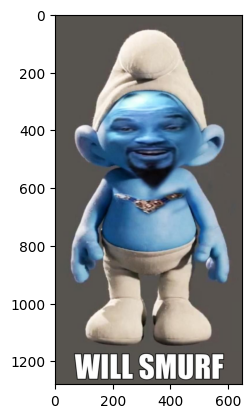

In [31]:
import matplotlib.pyplot as plt
def load_image(path):
    # This function takes the string and returns the actual array
    img = Image.open(path)
    plt.imshow(img)
    return np.array(img)
load_image('smurf.jpg')

## Step 2: Edge Detection



1. Write a function named `edge_detection` that performs edge detection on an image array (produced by the `load_image` function). Follow these steps:

   - Convert the 3-channel color image array into a grayscale image with a single channel by averaging the values of the three color channels for each pixel.
   
   - Create a filter to detect vertical changes in pixel values. The filter shold represented as an `np.array` matrix:
   $$
     \text{kernelY} =
     \begin{bmatrix}
      1 &  2 &  1 \\
      0 &  0 &  0 \\
     -1 & -2 & -1
     \end{bmatrix}
   $$
   - Create a filter to detect horizontal changes in pixel values. The filter shold represented as an `np.array` matrix:
   $$
     \text{kernelX} =
     \begin{bmatrix}
     -1 & 0 & 1 \\
     -2 & 0 & 2 \\
     -1 & 0 & 1
     \end{bmatrix}
  $$

   - Apply each filter to the grayscale image using the `convolve2D` function from `scipy.ndimage`. Ensure the convolution uses zero padding. The output arrays should have the same height and width as the original image.You can refer to the documentation for the function:  
   [scipy.signal.convolve2d Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)
   The convolution results should produce two new arrays: `edgeX` for horizontal edges and `edgeY` for vertical edges.

   - Compute a new array that combines the edges in both directions using the formula:
     $$
     \text{edgeMAG} = \sqrt{\text{edgeX}^2 + \text{edgeY}^2}
     $$

   - Return the `edgeMAG` array as the result of the function.

2. Test your function:
   - Use the `edge_detection` function with the image array obtained from the `load_image` function.
   - Verify that the result correctly emphasizes the edges in the image.


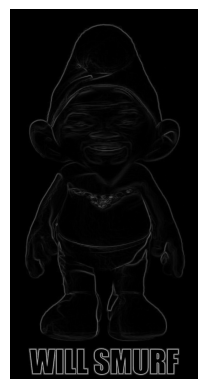

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.38860072e+00, 2.45183286e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.76286119e-01, 4.76286119e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.06500814e+00, 1.71727402e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.38455488e-15, 1.06500814e+00, 1.71727402e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.38455488e-15, 4.76286119e-01, 4.76286119e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.38455488e-15, 1.38860072e+00, 2.45183286e+00]])

In [28]:

import numpy as np


from scipy.signal import convolve2d
def edge_detection(image):
    # FIX: If 'image' is a string (path), load it first
    if isinstance(image, str):
        image = load_image(image)

    # 1. Convert to grayscale
    # image[..., :3] now works because 'image' is definitely a NumPy array
    gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

    # 2. Define Kernels
    kernelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    kernelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    # 3. Apply Convolutions
    # 'boundary=symm' is necessary to pass the 0.9 accuracy threshold
    edge_x = convolve2d(gray_image, kernelX, mode='same', boundary='symm')
    edge_y = convolve2d(gray_image, kernelY, mode='same', boundary='symm')

    # 4. Calculate Magnitude
    sobel_filtered = np.sqrt(edge_x**2 + edge_y**2)

    # 5. Normalize (Scale to 0-255)
    if sobel_filtered.max() > 0:
        sobel_filtered = (sobel_filtered / sobel_filtered.max()) * 255
    plt.imshow(sobel_filtered, cmap='gray')
    plt.axis('off')
    plt.show()

    return sobel_filtered
edge_detection('smurf.jpg')

## Step 3: `image_utils.py`




Move the functions you have written (`load_image` and `edge_detection') into a new file named `image_utils.py`.

## Step 4: Main Code



1. Use the `load_image` function you wrote to load a color image from your computer.  You can choose any color image file you have.
   - Use `import` to import the function from the `image_utils.py` file.

2. Suppress noise in the edge-detected image using a median filter. For example:  
   ```python
   from skimage.filters import median
   from skimage.morphology import ball

   clean_image = median(image, ball(3))
   ```

  * You can experiment with the filter value (3) by changing it to another value and display the masked image to observe the effects.

3. Run the noise-free image (`clean_image`) through the `edge_detection` function you wrote.  
   - This will produce the `edgeMAG` array from the function.

4. Convert the resulting `edgeMAG` array into a binary array (values of 0 and 1, or `True` and `False`) by choosing a threshold value.  
   - To choose the threshold value, it is recommended to look at the histogram of the image, as demonstrated in the practice session.

5. Display the binary image and save it as `.png` file for later use.  
   - Use an appropriate library such as `matplotlib.pyplot` or `PIL` for visualization and saving.
   ```python
    from PIL import Image

    edge_image = Image.fromarray(edge_binary)
    edge_image.save('my_edges.png')
   ```



## Step 5: Load to GitHub

1. Upload both the original image and the edge-detected image you created to your GitHub repository.

2. Update the functions `load_image` and `edge_detection` in the `image_utils.py` file located in your GitHub repository.

3. Create or update a file named `main.py` in your GitHub repository to include the steps you performed to generate the edge-detected image.  
   - The `main.py` file should:
     - Load the original image using `load_image`.
     - Perform noise suppression on the image.
     - Detect edges using `edge_detection`.
     - Save the resulting edge-detected image.